In [ ]:
#Problem Statement
#In this project, we try to implement a  sentiment analysis model that helps to overcome the challenges of identifying the sentiments
#of the sentences on a database of "restaurent reviews" by kaggle. The database contains contains two columns : reviews and their corresponding
#sentiments as 1-positive , 0-negative. further,use the best model to create a webapp.


#The various steps involved in the Machine Learning Pipeline are :


#Read and Load the Dataset
#Exploratory Data Analysis
#Data Visualization of Target Variables
#Data Preprocessing
#Splitting our data into Train and Test Subset
#Transforming Dataset using TF-IDF Vectorizer and count vectorizer
#creating webapp using the best model
#Conclusion

In [ ]:
#step 1.creating dataframe
import pandas as pd
df=pd.read_csv('/content/archive (2).zip', on_bad_lines='skip',sep='\t')
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [3]:
x=df['Review']
y=df['Liked']

In [13]:
#step 2: Exploratory Data Analysis
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [15]:
df.shape

(1000, 2)

In [16]:
df.dtypes

Review    object
Liked      int64
dtype: object

In [18]:
x.nunique()

996

<function matplotlib.pyplot.show>

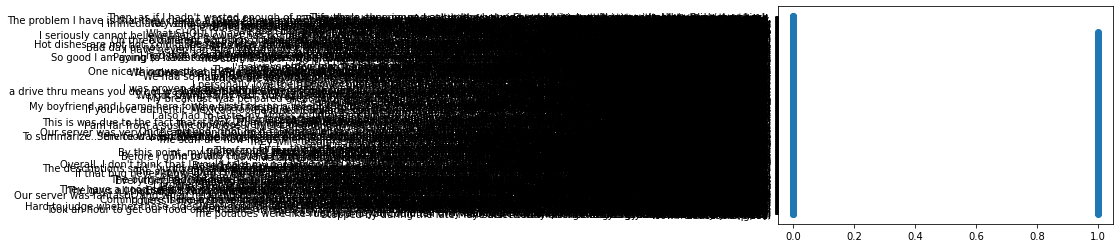

In [12]:
# step3:data visualisation
import matplotlib.pyplot as plt
plt.scatter(y,x)
plt.show

In [ ]:
#It can be seen clearly that the restaurent has more negative reviews than positive ones.

In [21]:
#step4: Data Preprocessing
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()
x1=df.Review.str.lower()#LOWER CASING
X1 = df['Review'].apply(tknzr.tokenize)#tokenisation


In [33]:
#Step-6: Splitting our data into Train and Test Subset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y, test_size=0.4,random_state=42)


In [34]:
#Step-7: Transforming Dataset using 1.count vectorizer
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect= CountVectorizer()
x_train_vect=vect.fit_transform(x_train)
x_test_vect=vect.transform(x_test)
#model 1
from sklearn.svm import SVC
model=SVC()
model.fit(x_train_vect,y_train)
SVC()
y_pred=model.predict(x_test_vect)
y_pred
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.7475

In [35]:
#model 2:using pipeline(count vectorizer +svc)
from sklearn.pipeline import make_pipeline

model2=make_pipeline(CountVectorizer(),SVC())
model2.fit(x_train,y_train)

y_pred2=model2.predict(x_test)
y_pred2
from sklearn.metrics import accuracy_score
accuracy_score(y_pred2,y_test)

0.7475

In [36]:
#model3:NAIVE BAYES
from sklearn.naive_bayes import MultinomialNB
model3= MultinomialNB()
model3.fit(x_train_vect,y_train)
MultinomialNB()
y_pred3=model3.predict(x_test_vect)
y_pred3
from sklearn.metrics import accuracy_score
accuracy_score(y_pred3,y_test)

0.805

In [37]:
#model4:MultinomialNB PIPELINE(count vectorizer +naive bais)
from sklearn.pipeline import make_pipeline
model4=make_pipeline(CountVectorizer(),MultinomialNB())
model4.fit(x_train,y_train)
y_pred4=model4.predict(x_test)
y_pred4
from sklearn.metrics import accuracy_score
accuracy_score(y_pred4,y_test)

0.805

In [38]:
#transforming dataset using 2.Tfidf vectorizer.
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer()
#model 11: tfidf vectorizer and svc
x_train_tfidf= v.fit_transform(x_train)
x_test_tfidf = v.transform(x_test)
from sklearn.svm import SVC
model1=SVC()
model1.fit(x_train_tfidf,y_train)
SVC()
y_pred11=model.predict(x_test_tfidf)
y_pred11
from sklearn.metrics import accuracy_score
accuracy_score(y_pred11,y_test)


0.6025

In [39]:
#model 12: pipeline(tfidf+svc)
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
model12=SVC()

model12=make_pipeline(TfidfVectorizer(),SVC())
model12.fit(x_train,y_train)

y_pred12=model12.predict(x_test)
y_pred12
from sklearn.metrics import accuracy_score
accuracy_score(y_pred12,y_test)


0.81

In [40]:
#model 13: naive bais
x_train_tfidf = v.fit_transform(x_train) 
x_test_tfidf = v.transform(x_test)
from sklearn.naive_bayes import MultinomialNB
model13= MultinomialNB()
model13.fit(x_train_tfidf,y_train)
MultinomialNB()
y_pred13=model13.predict(x_test_tfidf)
y_pred13
from sklearn.metrics import accuracy_score
accuracy_score(y_pred13,y_test)

0.8025

In [48]:
import joblib
joblib.dump (model12,'sentiment')
import joblib 
reload_model =joblib.load('sentiment')


In [49]:
#step 8
#creating webapp using the best model.
#It can be seen clearly that the model 12(pipeline model) has highest accuracy score.
#We will use model 12 while creating our streamlit webapp.
!pip install streamlit

In [50]:
%%writefile app.py
import streamlit as st
import joblib


st.header('This webapp will help you predict the sentiment behind your input sentence')
st.subheader("1-POSITIVE   0-NEGATIVE")

st.image('/content/download.png')

reload_model=joblib.load('sentiment')
ip=st.text_input("enter sentence/word")
op=reload_model.predict([ip])
if st.button ("predict sentiment"):
      st.title(op[0])

Overwriting app.py


In [51]:
!streamlit run app.py & npx  localtunnel  --port 8501

2022-04-11 19:14:22.571 INFO    numexpr.utils: NumExpr defaulting to 2 threads.
npx: installed 22 in 2.839s

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.233.218.174:8501

your url is: https://old-husky-6.loca.lt
  Stopping...
^C


In [ ]:
#conclussion:
#The above webapp will let the user to analyse his/her sentiment behind The
#entered sentence.